In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
train_path= pd.read_csv('IA1_train.csv')
val_path= pd.read_csv('IA1_dev.csv')
val_path

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3211200460,8/6/2014,4,1.00,1520,9800,1.5,0,0,4,...,1520,0,1971,0,98034,47.7303,-122.236,1540,7700,3.8900
1,4124000320,3/16/2015,3,2.25,1800,15903,1.0,0,0,3,...,1340,460,1986,0,98038,47.3813,-122.043,2000,15233,3.3562
2,7129302800,12/12/2014,3,1.50,1780,5000,1.0,0,4,4,...,1030,750,1958,0,98118,47.5168,-122.256,1780,7500,4.2000
3,1392800035,6/18/2014,2,1.00,1240,6400,1.0,0,1,4,...,1060,180,1938,0,98126,47.5493,-122.377,1240,6400,5.5900
4,2154900040,10/30/2014,3,2.25,2190,8834,1.0,0,0,3,...,1390,800,1987,0,98001,47.2633,-122.244,1490,8766,1.9425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5132000140,1/20/2015,6,1.00,1370,5080,1.5,0,0,3,...,1120,250,1931,0,98106,47.5238,-122.350,1020,5080,4.1500
1996,6624010170,5/8/2014,3,1.75,1390,7399,1.0,0,0,4,...,1390,0,1975,0,98031,47.4183,-122.182,1460,7800,2.4600
1997,1853080840,2/11/2015,5,3.50,3700,7055,2.0,0,0,3,...,3700,0,2014,0,98074,47.5929,-122.057,3170,6527,8.8995
1998,2767601311,10/24/2014,3,2.50,1260,1102,3.0,0,0,3,...,1260,0,2007,0,98107,47.6750,-122.387,1320,2500,4.4500


In [10]:
#remove the ID column from both training and validation data
train_without_id = train_path.drop(columns=['id'])
train_without_id.dtypes
test_without_id = val_path.drop(columns=['id'])
test_without_id.dtypes

date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price            float64
dtype: object

In [11]:
#change date into 3 numerical features day, month and year
train_without_id['date']=pd.to_datetime(train_without_id['date'], format='%m/%d/%Y')
#extract month, day and year into separate columns
train_without_id['SaleMonth']= train_without_id['date'].dt.month
train_without_id['SaleDat']= train_without_id['date'].dt.day
train_without_id['SaleYear']= train_without_id['date'].dt.year
#drop the original date column
train_without_id=train_without_id.drop(columns=['date'])
train_without_id.dtypes



bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price            float64
SaleMonth          int32
SaleDat            int32
SaleYear           int32
dtype: object

In [12]:
test_without_id['date']=pd.to_datetime(test_without_id['date'], format='%m/%d/%Y')
#extract month, day and year into separate columns
test_without_id['SaleMonth']= test_without_id['date'].dt.month
test_without_id['SaleDat']= test_without_id['date'].dt.day
test_without_id['SaleYear']= test_without_id['date'].dt.year
#drop the original date column
test_without_id=test_without_id.drop(columns=['date'])
test_without_id.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price            float64
SaleMonth          int32
SaleDat            int32
SaleYear           int32
dtype: object

In [13]:
#The feature yr_renovated is set to 0 if the house has not been renovated
train_without_id['age_since_renovated']=np.where(train_without_id['yr_renovated']!=0, 2024-train_without_id['yr_renovated'], 2024-train_without_id['yr_built'])
train_without_id
test_without_id['age_since_renovated']=np.where(test_without_id['yr_renovated']!=0, 2024-test_without_id['yr_renovated'], 2024-test_without_id['yr_built'])
test_without_id
#unique_bedrooms=sorted(train_without_id['age_since_renovated'].unique())
#unique_bedrooms


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,SaleMonth,SaleDat,SaleYear,age_since_renovated
0,4,1.00,1520,9800,1.5,0,0,4,7,1520,...,98034,47.7303,-122.236,1540,7700,3.8900,8,6,2014,53
1,3,2.25,1800,15903,1.0,0,0,3,8,1340,...,98038,47.3813,-122.043,2000,15233,3.3562,3,16,2015,38
2,3,1.50,1780,5000,1.0,0,4,4,7,1030,...,98118,47.5168,-122.256,1780,7500,4.2000,12,12,2014,66
3,2,1.00,1240,6400,1.0,0,1,4,7,1060,...,98126,47.5493,-122.377,1240,6400,5.5900,6,18,2014,86
4,3,2.25,2190,8834,1.0,0,0,3,7,1390,...,98001,47.2633,-122.244,1490,8766,1.9425,10,30,2014,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6,1.00,1370,5080,1.5,0,0,3,6,1120,...,98106,47.5238,-122.350,1020,5080,4.1500,1,20,2015,93
1996,3,1.75,1390,7399,1.0,0,0,4,7,1390,...,98031,47.4183,-122.182,1460,7800,2.4600,5,8,2014,49
1997,5,3.50,3700,7055,2.0,0,0,3,9,3700,...,98074,47.5929,-122.057,3170,6527,8.8995,2,11,2015,10
1998,3,2.50,1260,1102,3.0,0,0,3,8,1260,...,98107,47.6750,-122.387,1320,2500,4.4500,10,24,2014,17


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
y_train=train_without_id['price']
train_without_price=train_without_id.drop(columns=['price','yr_renovated'])
scaler.fit(train_without_price)
scaler_train=scaler.transform(train_without_price)
len(scaler_train[0])

21

In [15]:

y_test=test_without_id['price']
test_without_price=test_without_id.drop(columns=['price','yr_renovated'])
scaler.fit(test_without_price)
scaler_test=scaler.transform(test_without_price)
len(scaler_test[0])


21

In [17]:
#Part 1 (15 pts) Generate closed-form solution for reference.
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(scaler_train, y_train)
y_pred = lr_model.predict(scaler_test)

print("Prediction on training set:", y_pred)
#print("Accuracy on training set:", lr_model.score(X, y))
print(y_test)

from sklearn.metrics import mean_squared_error
rmse_test=mean_squared_error(y_test,y_pred)
print(rmse_test)


Prediction on training set: [ 1.90335597e+11 -2.59422099e+11 -5.83132411e+11 ...  6.35909545e+11
  1.37193750e+11  2.55740947e+11]
0       3.8900
1       3.3562
2       4.2000
3       5.5900
4       1.9425
         ...  
1995    4.1500
1996    2.4600
1997    8.8995
1998    4.4500
1999    3.7500
Name: price, Length: 2000, dtype: float64
1.8538144933826046e+23


In [18]:
y_train_pred=lr_model.predict(scaler_train)

rmse_train = mean_squared_error(y_train, y_train_pred)
rmse_train

3.766261557101944

In [19]:
lr_model.coef_


array([-2.74583504e-01,  4.41186373e-01,  6.49638549e+13,  6.90130299e-02,
        1.68917504e-02,  3.15402673e-01,  4.62462508e-01,  2.00102929e-01,
        1.12953734e+00, -5.91912523e+13, -3.10837604e+13, -8.80536850e-01,
       -2.63491004e-01,  8.48239160e-01, -3.00580061e-01,  1.29426588e-01,
       -9.64988861e-02,  6.96801499e-02, -4.56145155e-02,  1.83127079e-01,
       -1.02344529e-01])

In [20]:
lr_model.intercept_

5.349403143765474

In [21]:
print(test_without_id.columns.tolist())

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price', 'SaleMonth', 'SaleDat', 'SaleYear', 'age_since_renovated']


-- Epoch 1
Norm: 1.22, NNZs: 21, Bias: 5.333628, T: 8000, Avg. loss: 2.723188
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.31, NNZs: 21, Bias: 5.342710, T: 16000, Avg. loss: 2.392036
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.25, NNZs: 21, Bias: 5.380225, T: 24000, Avg. loss: 2.369254
Total training time: 0.13 seconds.
-- Epoch 4
Norm: 1.26, NNZs: 21, Bias: 5.362333, T: 32000, Avg. loss: 2.376582
Total training time: 0.14 seconds.
-- Epoch 5
Norm: 1.21, NNZs: 21, Bias: 5.366115, T: 40000, Avg. loss: 2.353092
Total training time: 0.14 seconds.
-- Epoch 6
Norm: 1.21, NNZs: 21, Bias: 5.399615, T: 48000, Avg. loss: 2.355295
Total training time: 0.16 seconds.
-- Epoch 7
Norm: 1.15, NNZs: 21, Bias: 5.348140, T: 56000, Avg. loss: 2.355602
Total training time: 0.24 seconds.
-- Epoch 8
Norm: 1.28, NNZs: 21, Bias: 5.370899, T: 64000, Avg. loss: 2.381207
Total training time: 0.26 seconds.
-- Epoch 9
Norm: 1.21, NNZs: 21, Bias: 5.373631, T: 72000, Avg. loss: 2.365309
Total trai

c:\Users\Ekaterina\miniconda3\envs\mltest\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Ekaterina\miniconda3\envs\mltest\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


=============== Loss Array ===============
[2.729848 2.36619  2.387776 2.354285 2.391085 2.353838 2.382396 2.365007
 2.370313 2.356952 2.347743 2.345008 2.361048 2.372911 2.367537 2.353017
 2.355177 2.365453 2.340849 2.3474   2.36209  2.365882 2.33054  2.352687
 2.341163 2.366613 2.346935 2.356743 2.346566 2.337721 2.350861 2.368413
 2.342262 2.343013 2.343398 2.367004 2.328775 2.326921 2.379347 2.331575
 2.353418 2.360376 2.357103 2.341436 2.338276 2.338385 2.356166 2.355712
 2.32676  2.36421  2.353841 2.356521 2.337224 2.328254 2.365373 2.350213
 2.326994 2.34582  2.352331 2.335897 2.354568 2.340459 2.334374 2.349992
 2.344109 2.348851 2.348371 2.306214 2.338897 2.328013 2.353142 2.341973
 2.357292 2.340265 2.3331   2.340709 2.329705 2.372055 2.323434 2.354771
 2.348836 2.322671 2.351975 2.338461 2.34721  2.34366  2.33114  2.354648
 2.36197  2.321117 2.3391   2.358707 2.350671 2.336001 2.345573 2.323327
 2.33859  2.325137 2.364956 2.317848 2.357779 2.331109 2.349361 2.357615
 2.29856

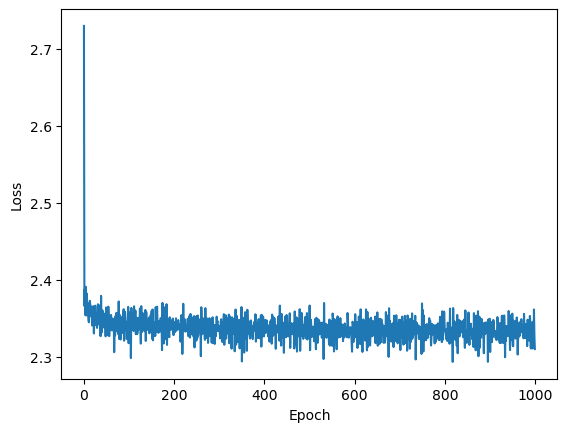

In [23]:
#Part 2 (40 pts) Implement and experiment with batch gradient descent
from sklearn.linear_model import SGDRegressor
lr_model_2 = SGDRegressor(loss='squared_error', alpha=1, n_iter_no_change=3000, verbose=1)
lr_model_2.fit(scaler_train, y_train)
y_pred_2 = lr_model.predict(scaler_test)

print("Prediction on training set:", y_pred_2)
#print("Accuracy on training set:", lr_model.score(X, y))
print(y_test)

from sklearn.metrics import mean_squared_error
rmse_test_2=mean_squared_error(y_test,y_pred_2)
print(rmse_test_2)
y_train_pred_2=lr_model.predict(scaler_train)

rmse_train_2 = mean_squared_error(y_train, y_train_pred_2)
rmse_train

import sys
import io
import matplotlib.pyplot as plt

class DisplayLossCurve(object):
  def __init__(self, print_loss=False):
    self.print_loss = print_loss

  """Make sure the model verbose is set to 1"""
  def __enter__(self):
    self.old_stdout = sys.stdout
    sys.stdout = self.mystdout = io.StringIO()
  
  def __exit__(self, *args, **kwargs):
    sys.stdout = self.old_stdout
    loss_history = self.mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
      if(len(line.split("loss: ")) == 1):
        continue
      loss_list.append(float(line.split("loss: ")[-1]))
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    if self.print_loss:
      print("=============== Loss Array ===============")
      print(np.array(loss_list))
      
    return True

with DisplayLossCurve(print_loss=True):
    lr_model_2.fit(scaler_train, y_train)



c:\Users\Ekaterina\miniconda3\envs\mltest\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


=============== Loss Array ===============
[2.350065 1.967887 1.955208 1.958477 1.941721 1.935263 1.932587 1.927405
 1.934134 1.936221 1.920465 1.926914 1.924134 1.924686 1.926721 1.928589
 1.923799 1.921046 1.923936 1.928647 1.922535 1.924667 1.922257 1.926571
 1.91855  1.919073 1.926491 1.918939 1.920183 1.921856 1.920438 1.927343
 1.912398 1.916685 1.92108  1.917755 1.904126 1.914284 1.919818 1.914971
 1.907946 1.915165 1.919468 1.919885 1.915436 1.918222 1.913831 1.91036
 1.918481 1.906289 1.917208 1.917876 1.912175 1.913158 1.916941 1.917515
 1.902776 1.910422 1.91239  1.895942 1.914137 1.915648 1.916397 1.906358
 1.910483 1.909112 1.917273 1.913064 1.912173 1.909771 1.912698 1.910851
 1.915542 1.910229 1.908952 1.912271 1.915528 1.908669 1.911793 1.917047
 1.906302 1.911176 1.915057 1.904878 1.910399 1.918088 1.916325 1.9102
 1.911765 1.908241 1.909453 1.91131  1.901859 1.904947 1.914032 1.91051
 1.907468 1.909012 1.905225 1.91151  1.91077  1.911407 1.912315 1.913065
 1.911677 1.

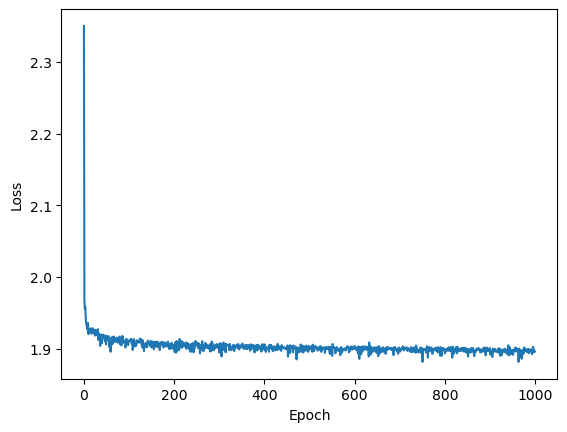

In [24]:
lr_model_3 = SGDRegressor(loss='squared_error', alpha=0.0001, n_iter_no_change=3000, verbose=1)
with DisplayLossCurve(print_loss=True):
    lr_model_3.fit(scaler_train, y_train)